In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
df = pd.read_csv('petition.csv', parse_dates=['start', 'end'])
# 데이터의 크기 확인
df.shape

(395547, 8)

In [4]:
# 전체 데이터로 보면 너무 느리기 때문에 본인의 관심사에 맞는 데이터를 가져옵니다.
child = df.loc[(df.title.str.contains('돌봄|육아|초등|보육', regex=True)) & \
           (df.content.str.contains('돌봄|육아|초등|보육', regex=True))] 
child.shape

(3455, 8)

In [5]:
child.head(3)

article_id      start        end  answered  votes category  \
23           45 2017-08-19 2017-11-17         0      0    육아/교육   
49           72 2017-08-20 2017-11-18         0    212    육아/교육   
360         387 2017-08-23 2017-09-22         0   1166    육아/교육   

                                                 title  \
23                               초등학교 교사 임용 시험 관련 해결방안   
49   초등학교의 영어회화전문강사를 비롯한 강사들의 무기계약 전환 시도는 교육대학교와 초등...   
360     유치원방과후 강사, 유치원 돌봄교사를 무기계약직 정규직으로 전환하는 것에 반대합니다   

                                               content  
23   초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...  
49   초등학교의 영어회화전문강사를 비롯한 강사들의 무기계약 전환 시도는 교육대학교와 초등...  
360  기회는 평등하게, 과정은 공정하게, 결과는 정의롭게~!\n대통령님 안녕하세요. 유치...

In [6]:
child.tail(3)

article_id      start        end  answered  votes   category  \
394943      516220 2019-02-03 2019-03-05         0     19  저출산/고령화대책   
395500      517053 2019-02-04 2019-03-06         0      1       정치개혁   
395539      517112 2019-02-04 2019-03-06         0      7       보건복지   

                                             title  \
394943  자녀출산 후 육아휴직을 자녀의 조부모(외조부모)가 사용할 수 있게 해주세요.   
395500           롯데가 초등학교 및 지역주민들의 일조권을 침해하려 합니다!!   
395539                         보육원생 자립지원 관심이 필요합니다   

                                                  content  
394943  안녕하세요?\n18개월 여자아기를 키우고 있는 육아휴직중인 직장인 엄마입니다.\n육...  
395500  악덕 롯데를 고발합니다!!!!!!!!\n마린시티 미개발부지\n부산광역시 해운대구 우...  
395539  보육원에서 자라난 아이들이\n18세에 500만원 손에 쥐고 자립해야하다니요?\n돈만...

In [7]:
child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455 entries, 23 to 395539
Data columns (total 8 columns):
article_id    3455 non-null int64
start         3455 non-null datetime64[ns]
end           3455 non-null datetime64[ns]
answered      3455 non-null int64
votes         3455 non-null int64
category      3455 non-null object
title         3455 non-null object
content       3455 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 242.9+ KB


In [8]:
child.describe()

article_id  answered         votes
count    3455.000000    3455.0   3455.000000
mean   212068.159479       0.0    232.153690
std    158165.466935       0.0   2842.353643
min        45.000000       0.0      0.000000
25%     65185.500000       0.0      2.000000
50%    192582.000000       0.0      7.000000
75%    345575.500000       0.0     26.000000
max    517112.000000       0.0  95167.000000

In [9]:
child.describe(include=np.object)

category             title  \
count      3455              3455   
unique       17              3067   
top       육아/교육  초등돌봄교실 지자체 이관 반대   
freq       2325                69   

                                                  content  
count                                                3455  
unique                                               3202  
top     초등돌봄교실은 학교 안에서 학부모와 학생으로부터 신뢰를 바탕으로 만족도가 1위인 정...  
freq                                                   30

## 시계열 데이터 보기

In [10]:
child['start_year'] = child['start'].dt.year
child['start_month'] = child['start'].dt.month
child['start_day'] = child['start'].dt.day
child['start_hour'] = child['start'].dt.hour
child['start_dow'] = child['start'].dt.dayofweek
child['start_wdn'] = child['start'].dt.weekday_name

# 요일을 좀 더 간단하게 표현해 봅니다.
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
child['start_dayofweek'] = child['start_dow'].apply(lambda x: days[x])
child.shape

(3455, 15)

In [11]:
# 월별 데이터 보기
child['start_month'].value_counts()

9     622
12    430
1     385
7     306
11    273
8     266
10    255
4     206
2     186
5     177
6     176
3     173
Name: start_month, dtype: int64

In [12]:
# 요일별 데이터 보기
child['start_dayofweek'].value_counts()

Thurs    650
Weds     648
Tues     600
Fri      541
Mon      492
Sat      270
Sun      254
Name: start_dayofweek, dtype: int64

In [13]:
# 요일별 데이터 보기
# 육아, 보육과 관련된 청원을 내는 사람들은 보통 수요일에 청원을 많이 내고 주말에는 적게 내는 것을 알수 있습니다.
child['start_wdn'].value_counts()

Thursday     650
Wednesday    648
Tuesday      600
Friday       541
Monday       492
Saturday     270
Sunday       254
Name: start_wdn, dtype: int64

## 한글폰트 사용하기
* 한글이 깨져보이는 것을 해결하기 위해 한글폰트 사용
* matplotlib 에서 설정

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#from matplotlib import rc
mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\fonts\\malgun.ttf'
fontProp = fm.FontProperties(fname=path, size=18)
print(fontProp.get_name())
print(fontProp.get_family())

Malgun Gothic
['sans-serif']


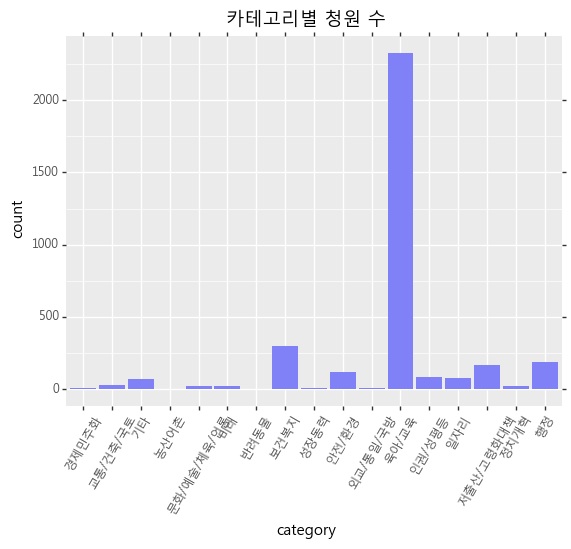

<ggplot: (26916549)>

In [15]:
# 카테고리별 청원 수
(ggplot(child)
 + aes('category')
 + geom_bar(fill='#8181F7')
 + ggtitle('카테고리별 청원 수')
 + theme(text=element_text(family=fontProp.get_name()),
        axis_text_x=element_text(rotation=60))
) 

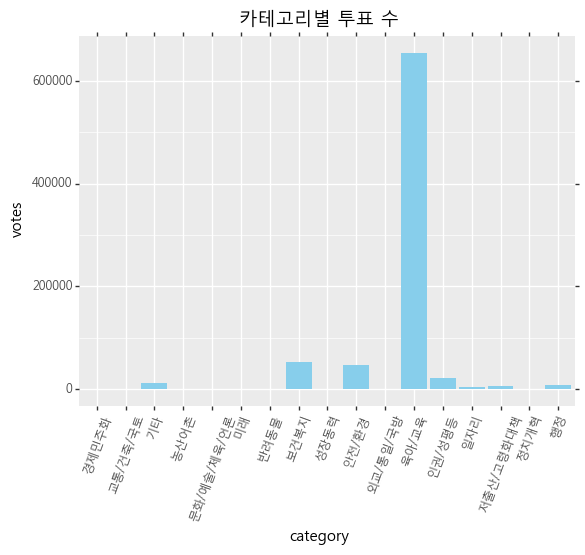

<ggplot: (26907463)>

In [16]:
# 카테고리별 투표수
(ggplot(child)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표 수')
 + theme(text=element_text(family=fontProp.get_name()),
        axis_text_x=element_text(rotation=70))
) 

In [17]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(child)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표 수')
 + coord_flip()
 + theme(text=element_text(family=fontProp.get_name()))
) 

<ggplot: (-9223372036827252448)>

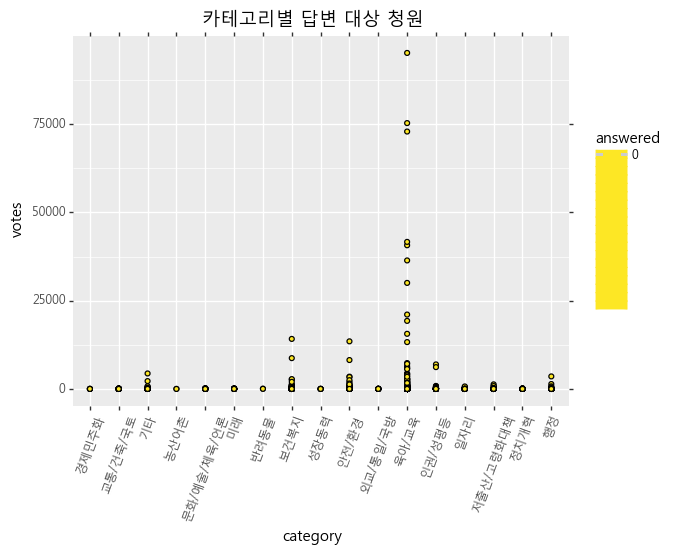

<ggplot: (27534063)>

In [18]:
#카테고리별 답변 대상 청원. geom_point()
(ggplot(child)
 + aes(x='category', y='votes', fill='answered')
 + geom_point()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(family=fontProp.get_name()),
        axis_text_x=element_text(rotation=70))
) 

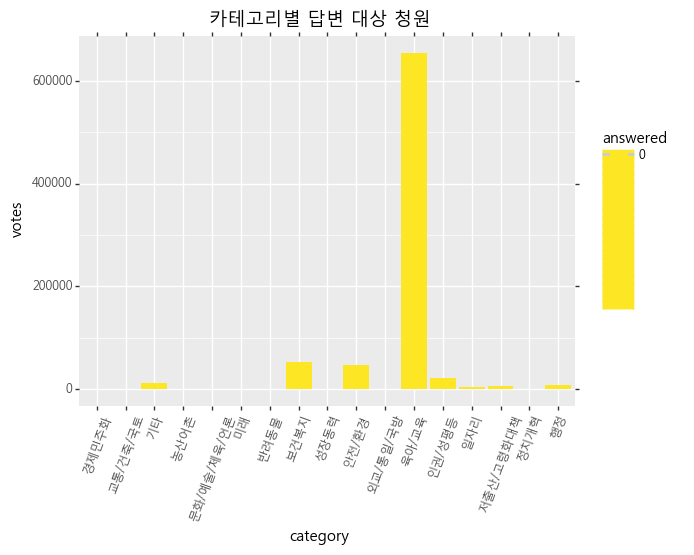

<ggplot: (-9223372036827222959)>

In [19]:
#카테고리별 답변 대상 청원. geom_col()
(ggplot(child)
 + aes(x='category', y='votes', fill='answered')
 + geom_col()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(family=fontProp.get_name()),
        axis_text_x=element_text(rotation=70))
) 

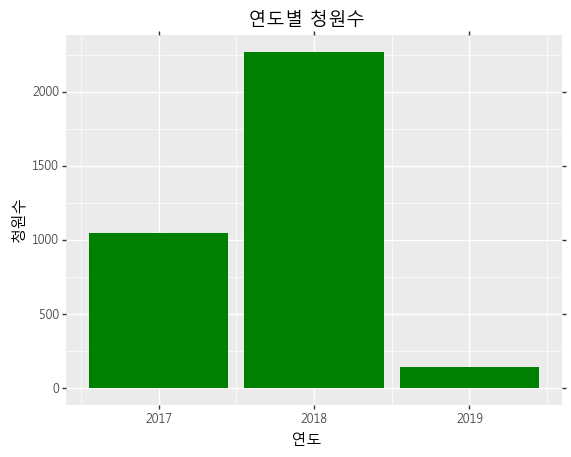

<ggplot: (-9223372036827241724)>

In [20]:
# 연도별 청원수는 크게 의미가 없다.
(ggplot(child)
 + aes('start_year')
 + geom_bar(fill='green')
 + labs(y='청원수', x='연도', title='연도별 청원수')
 + theme(text=element_text(family=fontProp.get_name()))
)

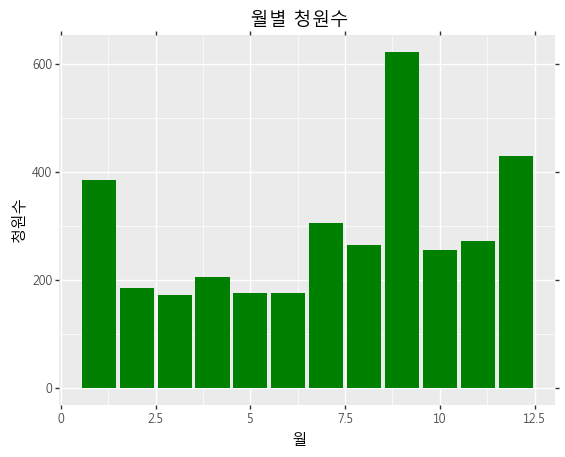

<ggplot: (-9223372036816476514)>

In [21]:
#월별 청원수
(ggplot(child)
 + aes('start_month')
 + geom_bar(fill='green')
 + labs(y='청원수', x='월', title='월별 청원수')
 + theme(text=element_text(family=fontProp.get_name()))
)

In [22]:
# 9월에 청원이 특히 많은데 상위 3개 날짜만 뽑아보자
child_9 = child.loc[child['start_month'] == 9]
child_9['start_day'].value_counts()[:3]

26    79
20    72
21    48
Name: start_day, dtype: int64

In [23]:
child_9_sample = child_9.loc[(child_9['start_day'] == 26) | (child_9['start_day'] == 20)]
child_9_sample[['title', 'content', 'votes']].sort_values(by='votes', ascending=False)[:20]

title  \
296520  김해시 관동초등학교에서 초등3학년아이가 십자인대파열이되었습니다..억울합니다!!!! ...   
296772     워킹맘들을 위해서 육아단축근무를 공무원만이 아닌 근로자는 모두 가능하도록 해주세요.   
299635                       초등학교 3교대 급식 말이 되나요?(한반에 45명)   
17052                                초등돌봄교실 지자체 이관을 반대합니다   
296599                              공휴일 초등학교 개방에 대하여.....   
15292                                초등돌봄교실 지자체 이관을 반대합니다   
16901               울산초등학교(울산광역시 중구 소재) 수직증축 철회 강력히 요청합니다   
296567           어린이집 보육시간 예전처럼 전업주부도 종일반으로 맡길수 있게 되돌려주세요   
17054                              돌봄교실 지자체이관을 결사반대합니다!!!   
15254                                        돌봄교실 지자체이관반대   
17027                               돌봄교실의 지자체 이관 결사 반대한다.   
15251                            초등돌봄교실 지자체 이관을 절대 반대합니다.   
15407                        초등돌봄교실 지자체이관과 사회서비스공단설립 절대반대   
16956                             초등돌봄교실 지자체 이관을 절대 반대합니다   
17062                                    초등돌봄교실 지자체 이관 반대   
17049                                     초등돌봄교실 지자체 이관반대   
17067                                    초등돌봄교실 지자체 이관 반대   
17048                                   초등돌봄교실 지자체 이관 반대건   
17026                       초등학교 돌봄교실 지체체 이관에 관하여 청원드립니다.   
17069                                    초등돌봄교실 지자체 이관 반대   

                                                  content  votes  
296520  탄     원     서\n■ 학 교 명 : 김해시 관동동 관동초등학교 운동장\n■...    163  
296772  현재 만5세 미만을 둔 공무원들은 2시간 육아단축근무를 쓰고 있습니다.\n그런데 일...     16  
299635  저는 인천 청라에 사는 학부모입니다...\n저희 셋째딸이 초등학교 1학년입니다.\n...     12  
17052   학부모들이 돌봄교실에 자녀를\n믿고 맡기는 것은 학교가 관리하기 때문인데 운영주체가...      7  
296599  경기도 안산에 살고 있는 초등학교 학부형  입니다.\n얼마전부터 저희 집앞에 있는 ...      7  
15292   초등돌봄교실 지자체 이관 반대입니다.\n돌봄전담사 의견을 들어봐 주세요....\n학...      6  
16901               울산초등학교(울산광역시 중구 소재) 수직증축 철회 강력히 요청합니다      6  
296567  박근혜정부때 맞춤반 종일반으로 나뉘었는데 어린이집에서는 수입이 줄었다고 경영상 이유...      6  
17054   돌봄전담사가 가장 우려하는 점은 시설은 학교에 있고 그 운영주체는 지자체가 맡아 분...      6  
15254   초등돌봄교실은 학교 안에서 학부모와 학생으로부터 신뢰를 바탕으로 만족도가 1위인 정...      6  
17027   돌봄교실은 학교 안에서의 가정이고 엄마의 중요한 자리다.  가정교육의 중요성은 익히...      6  
15251   초등돌봄교실은 학교 안에서 학부모와 학생으로부터 신뢰를 바탕으로 만족도가 1위인 정...      6  
15407   예전 지자체에서 운영할 당시 문제점이 제기되어 교육청으로 통합한 사실이 있는데 실패...      5  
16956   돌봄전담사가 가장 우려하는 점은 시설은 학교에 있고 그 운영주체는 지자체가 맡아 분...      5  
17062   초등저학년이 다니는 돌봄교실은 학교안에 잇어야 안전합니다. 지자체로 이관이 되면 안...      5  
17049   돌봄교실은 학교 안에서 운영되어야 안정적으로 운영됩니다. 돌봄교실이 과연 무엇을 하...      5  
17067   초등돌봄교실 이용 아동은 저학년입니다. 지역아동센터는 중학생까지 관리를 합니다. 어...      5  
17048   돌봄전담사가 가장 우려하는 점은 시설은 학교에 있고 그 운영주체는 지자체가 맡아 분...      5  
17026   난생 처음 저의 생각과 의견을 전하고 싶어 처음으로 청와대 홈페이지를 들어왔습니다....      5  
17069   초등돌봄교실 이용 아동은 저학년입니다. 지역아동센터는 중학생까지 관리를 합니다. 어...      5

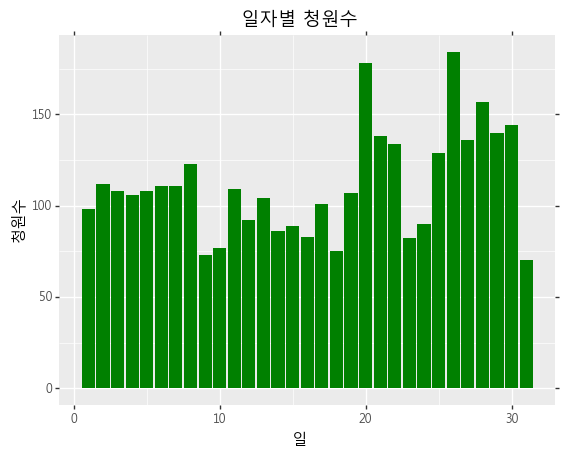

<ggplot: (38520440)>

In [24]:
#일자별 청원수
(ggplot(child)
 + aes('start_day')
 + geom_bar(fill='green')
 + labs(y='청원수', x='일', title='일자별 청원수')
 + theme(text=element_text(family=fontProp.get_name()))
)


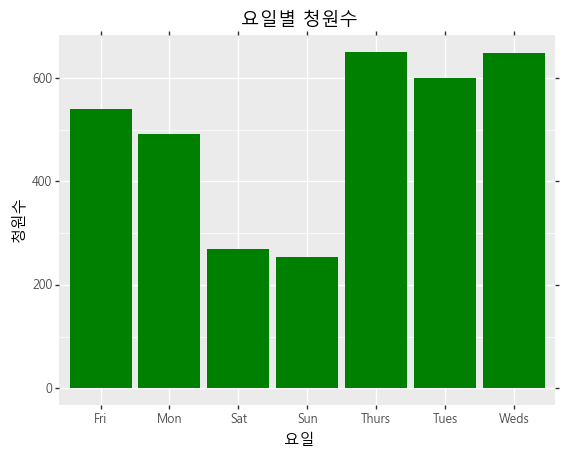

<ggplot: (38554239)>

In [25]:
# 요일별 청원수
(ggplot(child)
 + aes('start_dayofweek')
 + geom_bar(fill='green')
 + labs(y='청원수', x='요일', title='요일별 청원수')
 + theme(text=element_text(family=fontProp.get_name()))
) 

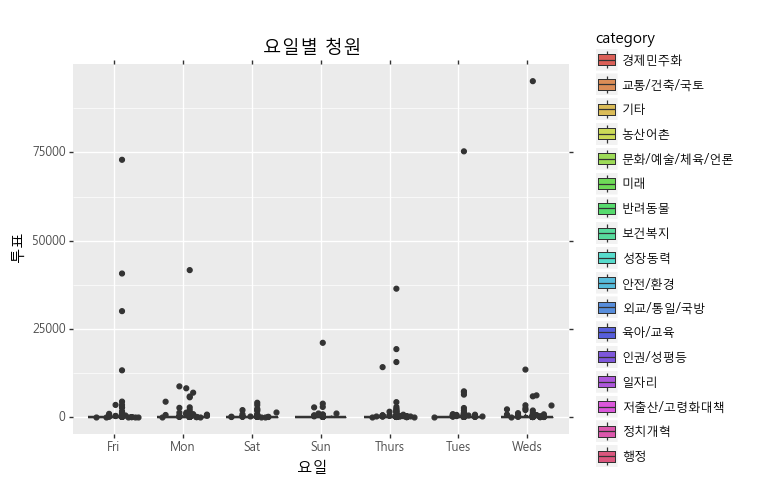

<ggplot: (-9223372036815721342)>

In [26]:
# 박스플롯
(ggplot(child, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(family=fontProp.get_name()))
)

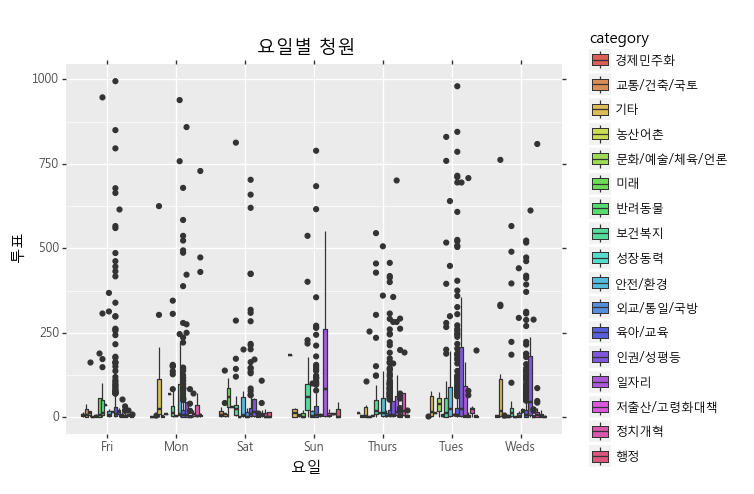

<ggplot: (37788203)>

In [27]:
#  투표수가 특정 건 이하인 데이터만 모아보기
# 그래프를 자세히 보기 위해
child_votes_25000 = child.loc[child['votes'] < 1000]

(ggplot(child_votes_25000, 
       aes(x='start_dayofweek', y='votes', fill='category'))
  + geom_boxplot()
  + labs(y='투표', x='요일', title='요일별 청원')
  + theme(text=element_text(family=fontProp.get_name()))
)